In [214]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [215]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [216]:
data = pd.read_csv('data/Finaltrain.csv')
data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,346,61,0,3,21
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,1225,203,3,29,79
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,345,60,0,9,24
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,451,76,0,10,33
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,145,27,0,2,10


In [217]:
# randomize data
data = data.sample(frac=1).reset_index(drop=True) # Mezclar los datos

data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,e32a76187192,814d6b,The Third Wave developed over such a short tim...,0.997243,1.880386,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,504,89,0,6,49
1,c6ead27f5d8a,ebad26,The ways the factory would various would use t...,-0.387791,-0.584181,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,411,77,0,5,32
2,18604e817df1,3b9047,The anchent egyptian goverment structure i...,0.879476,-0.335857,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,507,83,0,14,37
3,b5852dc9ed02,ebad26,"""Jonas had told them how the meat that was tak...",-1.547163,-1.461245,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,203,41,0,5,22
4,25c8be5ac274,814d6b,The Third Wave was an experiment and or moveme...,-0.922831,-1.338911,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,246,41,0,1,20


## Preprocesamiento

In [218]:
# normalizar variables numéricas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']] = scaler.fit_transform(data[['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']])

data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,e32a76187192,814d6b,The Third Wave developed over such a short tim...,0.997243,1.880386,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,0.101934,0.1072,0.0,0.038217,0.164430
1,c6ead27f5d8a,ebad26,The ways the factory would various would use t...,-0.387791,-0.584181,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,0.077627,0.0880,0.0,0.031847,0.107383
2,18604e817df1,3b9047,The anchent egyptian goverment structure i...,0.879476,-0.335857,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,0.102718,0.0976,0.0,0.089172,0.124161
3,b5852dc9ed02,ebad26,"""Jonas had told them how the meat that was tak...",-1.547163,-1.461245,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,0.023262,0.0304,0.0,0.031847,0.073826
4,25c8be5ac274,814d6b,The Third Wave was an experiment and or moveme...,-0.922831,-1.338911,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,0.034501,0.0304,0.0,0.006369,0.067114


In [219]:
tokenizer = Tokenizer(num_words=10000)  # Limitar a las 10,000 palabras más comunes
tokenizer.fit_on_texts(data['text'] + ' ' + data['prompt_text'])

In [220]:
sequences = tokenizer.texts_to_sequences(data['text'] + ' ' + data['prompt_text'])

In [221]:
maxlen = 200  # Puedes ajustar este valor según la longitud promedio
X = pad_sequences(sequences, maxlen=maxlen)

In [222]:
# Combinar las etiquetas en una matriz
y = data[['content', 'wording']].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
# Separar las etiquetas después de la división
y_content_train = y_train[:, 0]
y_wording_train = y_train[:, 1]
y_content_test = y_test[:, 0]
y_wording_test = y_test[:,1]

## RNN

In [224]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout


In [225]:
input_ = Input(shape=(maxlen,))

x = Embedding(input_dim=10000, output_dim=128, input_length=maxlen)(input_)

x = LSTM(256, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(64, return_sequences=False)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

C:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [226]:
# Predicción de content
content_output = Dense(1, activation='linear', name='content')(x)

# Predicción de wording
wording_output = Dense(1, activation='linear', name='wording')(x)

In [227]:
optimizer = 'adam'
loss = 'mean_squared_error'
metrics = ['mae', 'mae']
epochs = 15
batch_size = 256

In [228]:
model = Model(inputs=input_, outputs=[content_output, wording_output])
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [229]:
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 200, 128)  │  1,280,000 │ input_layer_12[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_26 (LSTM)      │ (None, 200, 256)  │    394,240 │ embedding_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 200, 256)  │          0 │ lstm_26[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_27 (LSTM)      │ (None, 200, 128)  │    197,120 │ dropout_22[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 200, 128)  │          0 │ lstm_27[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_28 (LSTM)      │ (None, 64)        │     49,408 │ dropout_23[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │      4,160 │ lstm_28[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_24          │ (None, 64)        │          0 │ dense_16[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 32)        │      2,080 │ dropout_24[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ content (Dense)     │ (None, 1)         │         33 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wording (Dense)     │ (None, 1)         │         33 │ dense_17[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,927,074 (7.35 MB)

 Trainable params: 1,927,074 (7.35 MB)

 Non-trainable params: 0 (0.00 B)

In [230]:
history = model.fit(
    X_train, 
    [y_content_train, y_wording_train], 
    validation_data=(X_test, [y_content_test, y_wording_test]), 
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

Epoch 1/15
23/23 - 28s - 1s/step - content_mae: 0.6548 - loss: 1.6239 - wording_mae: 0.7587 - val_content_mae: 0.4954 - val_loss: 1.0842 - val_wording_mae: 0.6469
Epoch 2/15
23/23 - 25s - 1s/step - content_mae: 0.4511 - loss: 0.9451 - wording_mae: 0.6059 - val_content_mae: 0.4206 - val_loss: 0.8387 - val_wording_mae: 0.5701
Epoch 3/15
23/23 - 23s - 1s/step - content_mae: 0.4249 - loss: 0.8395 - wording_mae: 0.5665 - val_content_mae: 0.4105 - val_loss: 0.7847 - val_wording_mae: 0.5541
Epoch 4/15
23/23 - 25s - 1s/step - content_mae: 0.4007 - loss: 0.7267 - wording_mae: 0.5207 - val_content_mae: 0.4327 - val_loss: 0.7980 - val_wording_mae: 0.5305
Epoch 5/15
23/23 - 26s - 1s/step - content_mae: 0.3784 - loss: 0.6326 - wording_mae: 0.4852 - val_content_mae: 0.3869 - val_loss: 0.6962 - val_wording_mae: 0.5236
Epoch 6/15
23/23 - 24s - 1s/step - content_mae: 0.3667 - loss: 0.5748 - wording_mae: 0.4597 - val_content_mae: 0.3870 - val_loss: 0.6908 - val_wording_mae: 0.5147
Epoch 7/15
23/23 - 23s

In [231]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_content_pred, y_wording_pred = model.predict(X_test)

print('MAE content:', mean_absolute_error(y_content_test, y_content_pred))
print('MSE content:', mean_squared_error(y_content_test, y_content_pred))
print('R2 content:', r2_score(y_content_test, y_content_pred))

print('\nMAE wording:', mean_absolute_error(y_wording_test, y_wording_pred))
print('MSE wording:', mean_squared_error(y_wording_test, y_wording_pred))
print('R2 wording:', r2_score(y_wording_test, y_wording_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step
MAE content: 0.3957955900311342
MSE content: 0.2680095987524747
R2 content: 0.7751061078488849

MAE wording: 0.5320961924474421
MSE wording: 0.47555511580038934
R2 wording: 0.58640306212602


In [232]:
import matplotlib.pyplot as plt

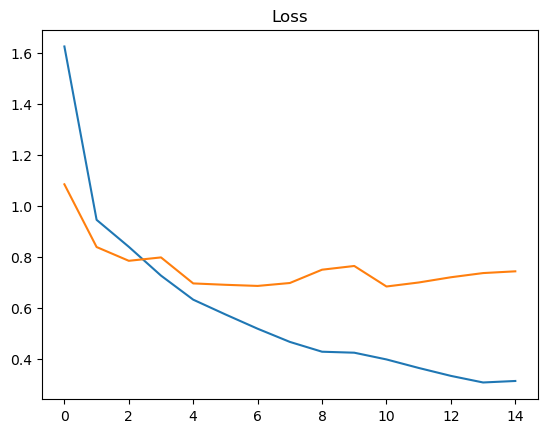

In [233]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.show()

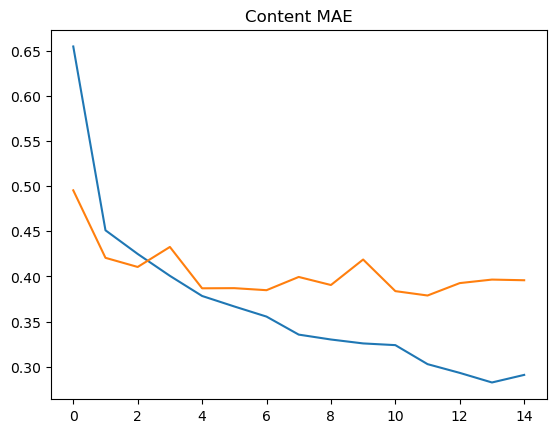

In [236]:
plt.plot(history.history['content_mae'])
plt.plot(history.history['val_content_mae'])
plt.title('Content MAE')
plt.show()

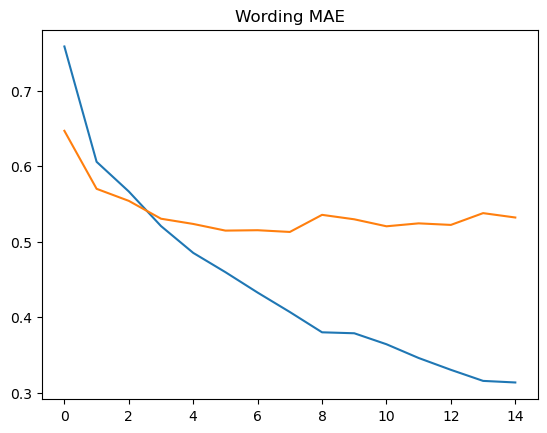

In [237]:
plt.plot(history.history['wording_mae'])
plt.plot(history.history['val_wording_mae'])
plt.title('Wording MAE')
plt.show()